# Linear Regression

In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.regression import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Initialize Spark session
spark = SparkSession.builder.appName('LinearRegression').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/28 10:48:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
# file_location = "/FileStore/tables/tips.csv" <- Databricks
file_location = "tips.csv"
file_type = "csv"

In [4]:
# Read data
df = spark.read.csv(file_location, header=True, inferSchema=True)
df.show()

+----------+----+------+------+---+------+----+
|total_bill| tip|   sex|smoker|day|  time|size|
+----------+----+------+------+---+------+----+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|
|     25.29|4.71|  Male|    No|Sun|Dinner|   4|
|      8.77| 2.0|  Male|    No|Sun|Dinner|   2|
|     26.88|3.12|  Male|    No|Sun|Dinner|   4|
|     15.04|1.96|  Male|    No|Sun|Dinner|   2|
|     14.78|3.23|  Male|    No|Sun|Dinner|   2|
|     10.27|1.71|  Male|    No|Sun|Dinner|   2|
|     35.26| 5.0|Female|    No|Sun|Dinner|   4|
|     15.42|1.57|  Male|    No|Sun|Dinner|   2|
|     18.43| 3.0|  Male|    No|Sun|Dinner|   4|
|     14.83|3.02|Female|    No|Sun|Dinner|   2|
|     21.58|3.92|  Male|    No|Sun|Dinner|   2|
|     10.33|1.67|Female|    No|Sun|Dinner|   3|
|     16.29|3.71|  Male|    No|Sun|Dinne

### Independent feature:

* tip
* sex
* smoker
* day
* time
* size

### Dependent feature:
* total_bill


In [5]:
df.printSchema()

root
 |-- total_bill: double (nullable = true)
 |-- tip: double (nullable = true)
 |-- sex: string (nullable = true)
 |-- smoker: string (nullable = true)
 |-- day: string (nullable = true)
 |-- time: string (nullable = true)
 |-- size: integer (nullable = true)



In [6]:
df.columns

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

## Handling Categorical Features

In [7]:
# Convert categorical features to numeric
indexer = StringIndexer(inputCol="sex", outputCol="sex_indexed")

df_r = indexer.fit(df).transform(df)

df_r.show()

+----------+----+------+------+---+------+----+-----------+
|total_bill| tip|   sex|smoker|day|  time|size|sex_indexed|
+----------+----+------+------+---+------+----+-----------+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|        1.0|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|        0.0|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|        0.0|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|        0.0|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|        1.0|
|     25.29|4.71|  Male|    No|Sun|Dinner|   4|        0.0|
|      8.77| 2.0|  Male|    No|Sun|Dinner|   2|        0.0|
|     26.88|3.12|  Male|    No|Sun|Dinner|   4|        0.0|
|     15.04|1.96|  Male|    No|Sun|Dinner|   2|        0.0|
|     14.78|3.23|  Male|    No|Sun|Dinner|   2|        0.0|
|     10.27|1.71|  Male|    No|Sun|Dinner|   2|        0.0|
|     35.26| 5.0|Female|    No|Sun|Dinner|   4|        1.0|
|     15.42|1.57|  Male|    No|Sun|Dinner|   2|        0.0|
|     18.43| 3.0|  Male|    No|Sun|Dinne

In [8]:
indexer = StringIndexer(inputCols=["smoker", "day", "time"], outputCols=["smoker_indexed", "day_indexed", "time_index"])

df_r = indexer.fit(df_r).transform(df_r)

df_r.show()

+----------+----+------+------+---+------+----+-----------+--------------+-----------+----------+
|total_bill| tip|   sex|smoker|day|  time|size|sex_indexed|smoker_indexed|day_indexed|time_index|
+----------+----+------+------+---+------+----+-----------+--------------+-----------+----------+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|        1.0|           0.0|        1.0|       0.0|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|        0.0|           0.0|        1.0|       0.0|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|        0.0|           0.0|        1.0|       0.0|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|        0.0|           0.0|        1.0|       0.0|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|        1.0|           0.0|        1.0|       0.0|
|     25.29|4.71|  Male|    No|Sun|Dinner|   4|        0.0|           0.0|        1.0|       0.0|
|      8.77| 2.0|  Male|    No|Sun|Dinner|   2|        0.0|           0.0|        1.0|       0.0|
|     26.88|3.12|  M

In [9]:
df_r.columns

['total_bill',
 'tip',
 'sex',
 'smoker',
 'day',
 'time',
 'size',
 'sex_indexed',
 'smoker_indexed',
 'day_indexed',
 'time_index']

## Assemble features

Group all the independent features together, and the dependent features separately.

In [10]:
featureassembler = VectorAssembler(inputCols=['tip', 'size', 'sex_indexed', 'smoker_indexed', 'day_indexed',
                            'time_index'],outputCol="Independent Features")

output = featureassembler.transform(df_r)

In [11]:
output.select('Independent Features').show()

+--------------------+
|Independent Features|
+--------------------+
|[1.01,2.0,1.0,0.0...|
|[1.66,3.0,0.0,0.0...|
|[3.5,3.0,0.0,0.0,...|
|[3.31,2.0,0.0,0.0...|
|[3.61,4.0,1.0,0.0...|
|[4.71,4.0,0.0,0.0...|
|[2.0,2.0,0.0,0.0,...|
|[3.12,4.0,0.0,0.0...|
|[1.96,2.0,0.0,0.0...|
|[3.23,2.0,0.0,0.0...|
|[1.71,2.0,0.0,0.0...|
|[5.0,4.0,1.0,0.0,...|
|[1.57,2.0,0.0,0.0...|
|[3.0,4.0,0.0,0.0,...|
|[3.02,2.0,1.0,0.0...|
|[3.92,2.0,0.0,0.0...|
|[1.67,3.0,1.0,0.0...|
|[3.71,3.0,0.0,0.0...|
|[3.5,3.0,1.0,0.0,...|
|(6,[0,1],[3.35,3.0])|
+--------------------+
only showing top 20 rows



In [12]:
# See all the features that are available
output.show()

+----------+----+------+------+---+------+----+-----------+--------------+-----------+----------+--------------------+
|total_bill| tip|   sex|smoker|day|  time|size|sex_indexed|smoker_indexed|day_indexed|time_index|Independent Features|
+----------+----+------+------+---+------+----+-----------+--------------+-----------+----------+--------------------+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|        1.0|           0.0|        1.0|       0.0|[1.01,2.0,1.0,0.0...|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|        0.0|           0.0|        1.0|       0.0|[1.66,3.0,0.0,0.0...|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|        0.0|           0.0|        1.0|       0.0|[3.5,3.0,0.0,0.0,...|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|        0.0|           0.0|        1.0|       0.0|[3.31,2.0,0.0,0.0...|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|        1.0|           0.0|        1.0|       0.0|[3.61,4.0,1.0,0.0...|
|     25.29|4.71|  Male|    No|Sun|Dinner|   4| 

## Pick up 2 columns

2 features:

In [13]:
finalized_data = output.select("Independent Features", "total_bill")

In [14]:
finalized_data.show()

+--------------------+----------+
|Independent Features|total_bill|
+--------------------+----------+
|[1.01,2.0,1.0,0.0...|     16.99|
|[1.66,3.0,0.0,0.0...|     10.34|
|[3.5,3.0,0.0,0.0,...|     21.01|
|[3.31,2.0,0.0,0.0...|     23.68|
|[3.61,4.0,1.0,0.0...|     24.59|
|[4.71,4.0,0.0,0.0...|     25.29|
|[2.0,2.0,0.0,0.0,...|      8.77|
|[3.12,4.0,0.0,0.0...|     26.88|
|[1.96,2.0,0.0,0.0...|     15.04|
|[3.23,2.0,0.0,0.0...|     14.78|
|[1.71,2.0,0.0,0.0...|     10.27|
|[5.0,4.0,1.0,0.0,...|     35.26|
|[1.57,2.0,0.0,0.0...|     15.42|
|[3.0,4.0,0.0,0.0,...|     18.43|
|[3.02,2.0,1.0,0.0...|     14.83|
|[3.92,2.0,0.0,0.0...|     21.58|
|[1.67,3.0,1.0,0.0...|     10.33|
|[3.71,3.0,0.0,0.0...|     16.29|
|[3.5,3.0,1.0,0.0,...|     16.97|
|(6,[0,1],[3.35,3.0])|     20.65|
+--------------------+----------+
only showing top 20 rows



## Apply linear regression

In [15]:
# Train-test split
train_data, test_data = finalized_data.randomSplit([0.75, 0.25])

# Initialize and train regressor
regressor = LinearRegression(featuresCol='Independent Features', labelCol='total_bill')

regressor = regressor.fit(train_data)

24/05/28 10:48:06 WARN Instrumentation: [19af6e74] regParam is zero, which might cause numerical instability and overfitting.
24/05/28 10:48:06 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/05/28 10:48:06 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
24/05/28 10:48:06 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


## Regression Line

The line of regression is defined by the **coefficients** and **intercept** learned by the linear regression model during training.

It is the line that best fits the data according to the linear regression model.

In [16]:
regressor.coefficients

DenseVector([3.2672, 3.3676, -1.3706, 2.8405, -0.4126, -0.5076])

In [17]:
regressor.intercept

1.407690676794453

## Evaluate

In [18]:
# Predictions
pred_results = regressor.evaluate(test_data)

In [19]:
type(pred_results)

pyspark.ml.regression.LinearRegressionSummary

## Compare actual vs. predicted values

In [20]:
# Final comparison
pred_results.predictions.show()

+--------------------+----------+------------------+
|Independent Features|total_bill|        prediction|
+--------------------+----------+------------------+
|(6,[0,1],[1.25,2.0])|     10.51|12.226942863193354|
|(6,[0,1],[1.75,2.0])|     17.82|  13.8605544763405|
| (6,[0,1],[2.0,2.0])|     13.37|14.677360282914073|
| (6,[0,1],[2.0,3.0])|     16.31| 18.04497185967959|
|(6,[0,1],[2.31,3.0])|     18.69| 19.05781105983082|
|(6,[0,1],[2.34,4.0])|     17.81|22.523439333385166|
| (6,[0,1],[3.0,2.0])|      14.0|17.944583509208364|
|(6,[0,1],[3.18,2.0])|     19.82|18.532683689941337|
| (6,[0,1],[5.0,3.0])|     31.27|27.846641538562466|
|[1.36,3.0,1.0,0.0...|     18.64|13.250517484038706|
|[1.5,2.0,1.0,0.0,...|     26.41| 11.67313584101501|
|[1.5,2.0,1.0,0.0,...|     10.65|10.340317158954388|
|[1.58,2.0,0.0,1.0...|     13.42|14.400203197143409|
|[1.61,2.0,1.0,1.0...|     10.59|  14.8730365184174|
|[1.76,2.0,0.0,1.0...|     11.24| 16.73373283111346|
|[1.96,2.0,0.0,0.0...|     15.04| 14.134060582

## Performance Metrics

In [21]:
pred_results.r2, pred_results.meanAbsoluteError, pred_results.meanSquaredError

(0.480078894378447, 4.2239973634845125, 36.59866084220231)

# Linear Regression Prediction Graph

Create a graph to show the prediction results of your linear regression model in PySpark. **Plot the actual vs. predicted values**.

**Line of equality:** A 45-degree line that shows where predicted values equal actual values.

**We don't plot the regression line** here because it's not straightforward in a multivariate context. The line of regression in such cases doesn't fit well in a 2D plot unless you hold other variables constant, which can be misleading. The scatter plot along with the line of equality gives a clear visual indication of how well the model's predictions match the actual values.

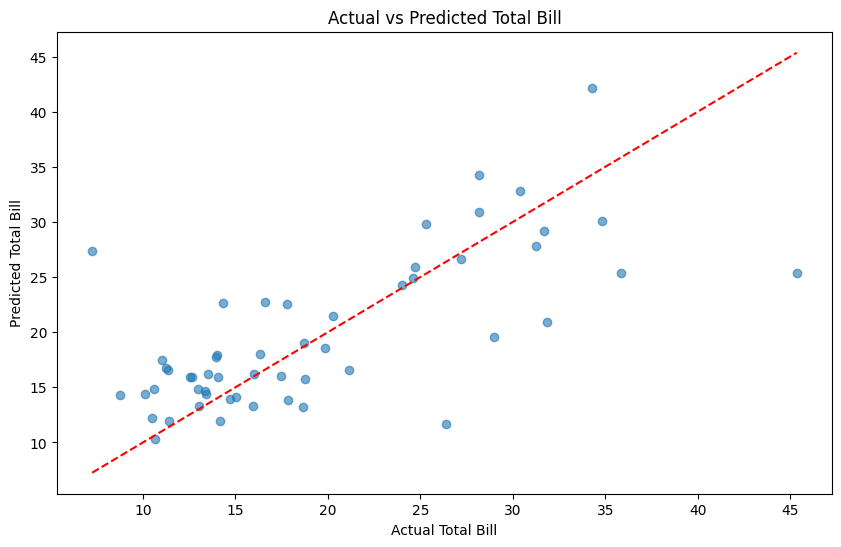

In [22]:
# Extract predictions and actual values
predictions = pred_results.predictions.select("prediction", "total_bill").toPandas()

# Plotting the results
plt.figure(figsize=(10, 6))

# The scatter points represent the actual vs. predicted values
# Actual total_bill on x-axis and predicted total_bill on y-axis
plt.scatter(predictions["total_bill"], predictions["prediction"], alpha=0.6)

# Red dashed line represents the ideal predictions (where actual equals predicted)
plt.plot([predictions["total_bill"].min(), predictions["total_bill"].max()],
         [predictions["total_bill"].min(), predictions["total_bill"].max()],
         color='red', linestyle='--')

plt.xlabel("Actual Total Bill")
plt.ylabel("Predicted Total Bill")
plt.title("Actual vs Predicted Total Bill")
plt.show()

Here it is with a regression line:

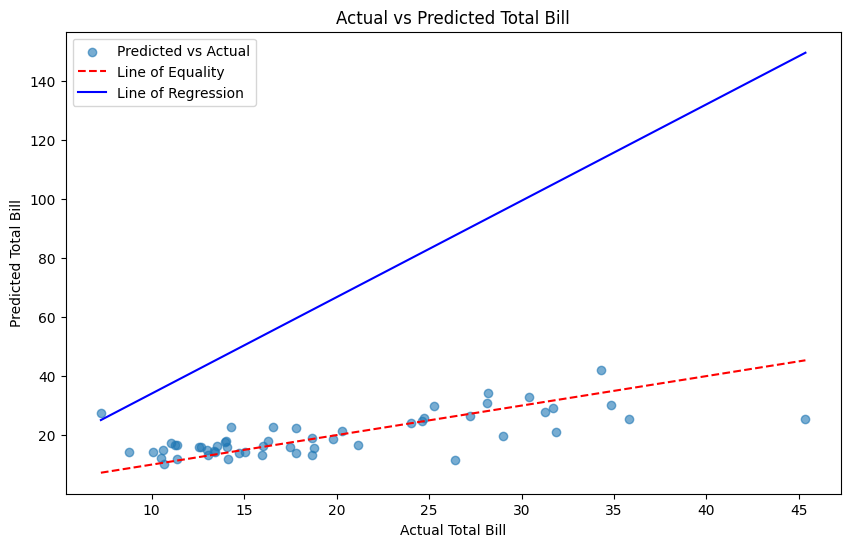

24/05/28 10:48:15 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [23]:
# We have the regression coefficients and intercept from the model
coefficients = regressor.coefficients
intercept = regressor.intercept

# Create a range of values for plotting the line of regression
import numpy as np

x_range = np.linspace(predictions["total_bill"].min(), predictions["total_bill"].max(), 100)
y_range = intercept + coefficients[0] * x_range  # Adjust based on the feature you are plotting against

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(predictions["total_bill"], predictions["prediction"], alpha=0.6, label='Predicted vs Actual')
plt.plot([predictions["total_bill"].min(), predictions["total_bill"].max()],
         [predictions["total_bill"].min(), predictions["total_bill"].max()],
         color='red', linestyle='--', label='Line of Equality')
plt.plot(x_range, y_range, color='blue', linestyle='-', label='Line of Regression')
plt.xlabel("Actual Total Bill")
plt.ylabel("Predicted Total Bill")
plt.title("Actual vs Predicted Total Bill")
plt.legend()
plt.show()


## Save the Model

```python
# Save the model to a specified path
model_path = "/path/to/save/model"
regressor.save(model_path)
```

## Load the Model

```python
from pyspark.ml.regression import LinearRegressionModel

# Load the model from the specified path
loaded_regressor = LinearRegressionModel.load(model_path)
```

## Example

```python
# Initialize and train regressor
regressor = LinearRegression(featuresCol='Independent Features', labelCol='total_bill')
regressor = regressor.fit(train_data)

# Save the model to a specified path
model_path = "/path/to/save/model"
regressor.save(model_path)

# Load the model from the specified path
loaded_regressor = LinearRegressionModel.load(model_path)

# Predictions using the loaded model
pred_results = loaded_regressor.evaluate(test_data)
```
